100%|██████████| 20/20 [00:00<00:00, 903.39it/s]


Difference in powers of 10 at n=2: 1.285140142535685
296073188139524.2
Difference in powers of 10 at n=3: 2.719378342053404
12102705024879.281
Difference in powers of 10 at n=4: 4.19071647337884
435508460362.0848
Difference in powers of 10 at n=5: 5.678160644633185
14807514793.172894
Difference in powers of 10 at n=6: 7.174671944915424
487649535.45137835
Difference in powers of 10 at n=7: 8.677029355468376
15735120.407217957
Difference in powers of 10 at n=8: 10.183485528763413
500592.6541558459
Difference in powers of 10 at n=9: 11.69298234557671
15761.178753912727
Difference in powers of 10 at n=10: 13.204782237783494
492.370160977559
Difference in powers of 10 at n=11: 14.71789324553719
15.305104620180796
Difference in powers of 10 at n=12: 16.243403494085232
0.46164777064963547
Difference in powers of 10 at n=13: 18.524284904761345
0.002442707573293075
Difference in powers of 10 at n=14: 17.792446761772794
0.013295516472471009
Difference in powers of 10 at n=15: 17.565185599546567


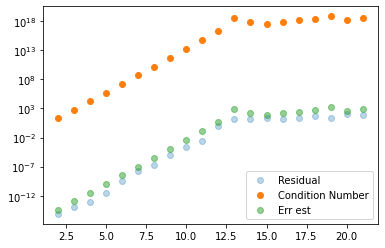

In [6]:
from scipy.linalg import hilbert as hilb
import scipy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

rns = []
cns = []
err = []
diff = []
max_n = 21
for n in tqdm(range(2, max_n + 1)):
    x0 = np.ones(n)
    Hn = hilb(n)
    # print(scipy.linalg.svdvals(Hn))
    cn = np.linalg.cond(Hn)

    b = np.dot(Hn, x0)
    xc = np.linalg.solve(Hn, b)

    rn = np.linalg.norm(xc - x0)
    errest = cn * np.finfo(float).eps
    rns.append(rn)
    cns.append(cn)
    err.append(errest)
    print(f"Difference in powers of 10 at n={n}:", np.log10(abs(rn - cn)))
    print(min(scipy.linalg.svdvals(Hn)) / np.finfo(float).eps)

plt.scatter(list(range(2, max_n + 1)), rns, label='Residual', alpha=.3)
plt.scatter(list(range(2, max_n + 1)), cns, label='Condition Number', alpha=1)
plt.scatter(list(range(2, max_n + 1)), err, label='Err est', alpha=.5)

plt.yscale("log")
plt.legend()

### How many orders of magnitude separate the value of the residual and the value of the condition number?  Why is this the case?

As n increases, as does the order of magnitude of separation between the residual and condition number at n.
The condition number grows as order $O(\frac{(1 + \sqrt{2})^{4n}}{\sqrt{n}})$, whereas the residual operation is not an exponential time operation.
The exponential growth in the residual is therefore due to the difference in asymptotic growth between the `linsolve()` and condition number operations.

### Why do the condition number and the residual seem to saturate for $n \geq 13$?  Hint:  Matlab’s `cond()` actually computes the inverse of the condition number, $1/κ$.  What effect might round-off error have on $1/κ$?

The condition number is calculated via SVD, so for Hilbert matrices, it is derived by dividing the first singular value over the last singular value. As $n \rightarrow \infty$,
the min singular value tends to zero, ending up at `eps(1)`. The numerator keeps growing, but due to the large number in the numerator and small number in the denominator, the answer .

In [ ]:
Hn = hilb(9000)
print(scipy.linalg.svdvals(Hn)[0])